In [ ]:
# you have to add self to every method to use as instance
class Car:
    make = "Toyota"
    model = "Camry"

    # instance method
    def drive():
        print(f"Driving {self.make}")


my_car = Car()
Car.drive()

In [ ]:
# otherwise, works like Java
class Car:
    make = "Toyota"
    model = "Camry"

    # instance method
    def drive(self):
        print("Driving")

    def greet_drive(self, name):
        print(f"Welcome to your {self.make} {self.model}, {name}!")

    # static method
    def honk():
        print("Honk!")


my_car = Car()
my_car.drive()
Car.honk()

# Understanding `classmethod` and `staticmethod`

In Python, class methods and static methods are used to define methods that are not strictly tied to an instance of a class. They allow us to define functionality related to a class but can be called without creating an instance of the class.

## `classmethod`
- A `classmethod` receives the class as the first argument instead of `self`.
- It can access and modify class state that applies across all instances of the class.
- Decorated with `@classmethod`.

## `staticmethod`
- A `staticmethod` does not receive an implicit first argument.
- Essentially the same as regular functions defined inside a class but lives in the class's namespace.
- Decorated with `@staticmethod`.

### When to Use Them
- Use `classmethod` when you need to access or modify the class state.
- Use `staticmethod` when the method doesn't access any class or instance-specific data.

In [ ]:
class DemoClass:
    count = 0  # A class variable

    @classmethod
    def increment_count(cls):
        cls.count += 1

    @staticmethod
    def utility_method():
        print("This is a static utility method.")


# Calling classmethod
DemoClass.increment_count()
print(DemoClass.count)  # Output: 1

# Calling staticmethod
DemoClass.utility_method()  # Output: This is a static utility method.

In [ ]:
# Except you can inherit from multiple classes
class Car:
    def honk(self):
        print("Honk!")


class Boat:
    def swim(self):
        print("Horn sound")


class AmphibiousVehicle(Car, Boat):
    pass


# what do you think this will print?
av = AmphibiousVehicle()
av.honk()

# Basic Introduction to Method Resolution Order (MRO) in Python

Method Resolution Order (MRO) is a fundamental concept in Python's approach to Object-Oriented Programming (OOP), particularly when dealing with multiple inheritance. It determines the order in which Python looks for a method in a hierarchy of classes.

## Why MRO Matters
- **Clarity**: MRO provides a clear and predictable order for method resolution, which is crucial in complex inheritance structures.
- **Avoiding Conflicts**: In multiple inheritance scenarios, the same method could exist in multiple parent classes. MRO helps Python decide which one to use.

## How Python Determines MRO
- Python uses a specific algorithm, known as C3 Linearization, to calculate the MRO. This ensures that:
  - Subclasses come before base classes.
  - The order of base classes is preserved.
  - The first two rules apply recursively to all base classes.

Understanding MRO is essential for designing class hierarchies in Python, especially when utilizing multiple inheritance to ensure predictable and desired behaviors in your programs.

In [ ]:
class Base:
    def method(self):
        print("Base method")


class FirstChild(Base):
    def method(self):
        print("FirstChild method")


class SecondChild(Base):
    def method(self):
        print("SecondChild method")


class GrandChild(FirstChild, SecondChild):
    pass


# Creating an instance of GrandChild
gc_instance = GrandChild()
gc_instance.method()
print(GrandChild.mro())

# Simplified Explanation of `@property` in Python

In Python, the `@property` decorator is a built-in way to create and manage attributes in classes without directly exposing the attribute's implementation. It's like creating a "smart" attribute with some logic behind it.

## Why Use `@property`?
- **Control**: It gives you control over the value of a property with the ability to add logic inside its getter method.
- **Readability**: Accessing attributes through properties makes your code more readable and maintainable.
- **No Need for Explicit Getter Methods**: Instead of calling a method like `get_radius()`, you can simply access the attribute with `circle.radius`.

### Using `@property`
Decorate a method in a class with `@property` to let Python know it's a property. This method then acts as the getter for the property.

### Key Point
- The `@property` decorator is ideal for when you need to add some control or logic when accessing an attribute but want to keep the simplicity of attribute access.


In [ ]:
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        """Return the radius with potential logic before access."""
        # Logic can be added here, e.g., logging, computation, etc.
        return self._radius


# Creating an instance of Circle
circle = Circle(5)
print(circle.radius)  # Accesses the radius property
print(circle.radius)

# can I just do circle.radius = 10?

In [ ]:
### Python Code Slide: Demonstrating `@property` with Setter and Deleter
class Temperature:
    def __init__(self, celsius):
        self._celsius = celsius

    @property
    def celsius(self):
        return self._celsius

    @celsius.setter
    def celsius(self, value):
        if value < -273.15:
            raise ValueError("Temperature below absolute zero!")
        self._celsius = value

    @celsius.deleter
    def celsius(self):
        del self._celsius


temp = Temperature(25)
print(temp.celsius)

temp.celsius = -200  # Should raise ValueError

del temp.celsius

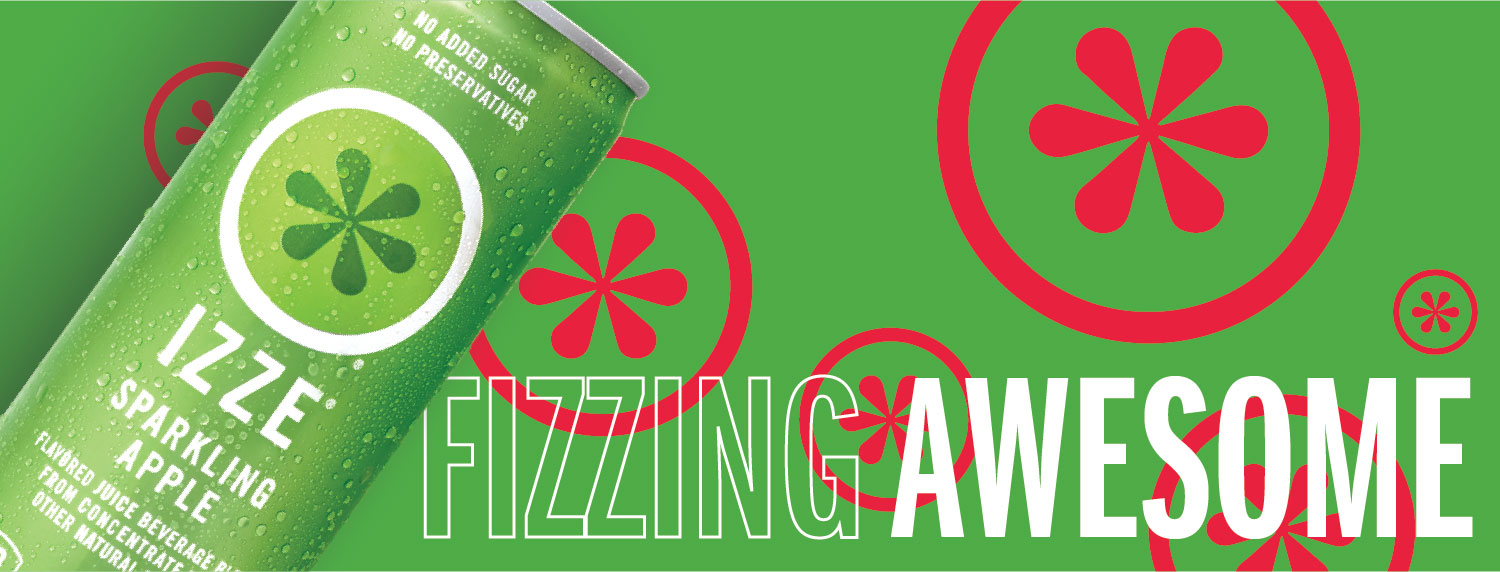

### Announcements
- Homework 2 is released (follow the comments, pay attention, shouldn't be toooo hard)
    - If the homework starts to take too long or is too difficult, post on Ed & come to Office Hours

- No more quizzes

- Will be cold-calling / asking for more participation

### Today
- Wrapping up classes
- Context Managers
- Iterators
- File I/O
- Turtles?
- Nonlocal / Global keywords & Scoping

# The `__init__` Method in Python Classes
- The `__init__` method, known as the initializer or constructor, is fundamental in Python classes.
- It's automatically invoked when a new instance of a class is created.
- This method initializes the instance's attributes and performs any necessary setup.

## Using `__init__` for Initialization
- The `__init__` method can take arguments to customize the initialization of the instance.
- The first argument is always `self`, which represents the instance.

In [2]:
# Defining a class with an __init__ method
class Car:
    def __init__(self, make, model):
        self.make = make
        self.model = model


# Creating an instance of the Car class
my_car = Car("Toyota", "Corolla")
print(my_car.make, my_car.model)  # Output: Toyota Corolla

Toyota Corolla


# Python's Approach to Private Variables
- Unlike languages like Java, Python does not have a concept of strictly enforced private variables.
- Instead, Python uses a naming convention to indicate that a variable is intended for internal use.

## The Single Underscore (_) Convention
- A single underscore `_` prefix in front of a variable or method name is a widely respected convention to suggest it's meant for internal use.
- This convention informs other developers that the attribute or method should not be accessed directly, though it can be.
- It's important to note that this is not enforced by Python's syntax, but rather a guideline followed by developers.

### Example: Indicating Internal Variables
- Below is an example of how the single underscore is used to indicate an internal variable in a Python class.

In [3]:
# Defining a class with an internal-use variable
class Car:
    # assign class variables dynamically
    def __init__(self, make, model, vin):
        self.make = make
        self.model = model
        self._vin = vin


# Creating an instance and accessing attributes
my_car = Car("Toyota", "Corolla", 123231221)
print("Internal variable make:", my_car.make)  # Accessing an internal variable
print("Internal variable model:", my_car.model)
print("Internal variable vin:", my_car._vin)

Internal variable make: Toyota
Internal variable model: Corolla
Internal variable vin: 123231221


## Understanding str and __eq__ Methods in Python
- In Python, the str and __eq__ methods play a crucial role in defining string representations and equality checks of objects, similar to Java's toString and equals methods.

### The str Method in Python
- The str method in Python is similar to the toString method in Java.
- It defines how an object should be represented in a human-readable form, typically as a string.
- This method is called when you use the str() function or when an object is printed.
### The __eq__ Method in Python
- The __eq__ method in Python is akin to Java's equals method.
- It's used for comparing two objects based on their content, not their memory addresses.
- By overriding __eq__, you can define custom equality logic for your objects.

In [4]:
# Defining a Python class with custom 'str' and '__eq__' methods
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author

    def __str__(self):
        return f"{self.title} by {self.author}"

    def __eq__(self, other):
        if not isinstance(other, Book):
            return False
        return self.title == other.title and self.author == other.author


# Creating instances and demonstrating 'str' and '__eq__' methods
book1 = Book("1984", "George Orwell")
book2 = Book("1984", "George Orwell")
book3 = Book("Animal Farm", "George Orwell")

# Using 'str' method
print(book1)  # Outputs: "1984 by George Orwell"

# Using '__eq__' method
print(book1 == book2)  # Outputs: True
print(book1 == book3)  # Outputs: False

1984 by George Orwell
True
False


# (Aside) Overloading Arithmetic Operators in Python
- Python allows classes to define how arithmetic operations like addition, subtraction, and multiplication are performed on their instances.
- By implementing special methods like `__add__`, `__sub__`, and `__mul__`, you can define custom behavior for these operations.

## How It Works
- When you perform an operation like `a + b`, Python internally calls `a.__add__(b)`.
- Similarly, `a - b` calls `a.__sub__(b)`, and `a * b` calls `a.__mul__(b)`.
- By defining these methods in your class, you customize how instances interact with each other using arithmetic operators.

### Example: Custom Arithmetic in a Class
- Let's create a simple `Point` class where we can add, subtract, and multiply point coordinates.

In [5]:
# Defining a class with custom arithmetic methods
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        return Point(self.x * other.x, self.y * other.y)

    def __str__(self):
        return f"Point({self.x}, {self.y})"


# Creating instances of Point
point1 = Point(1, 2)
point2 = Point(3, 4)

# Using overloaded operators
print("Add:", point1 + point2)  # Outputs: Point(4, 6)
print("Subtract:", point1 - point2)  # Outputs: Point(-2, -2)
print("Multiply:", point1 * point2)  # Outputs: Point(3, 8)

Add: Point(4, 6)
Subtract: Point(-2, -2)
Multiply: Point(3, 8)


In [6]:
# what will this print?
class Car:
    def __init__(self, make, model):
        self.make = make
        self.model = model


my_car = Car("Toyota", "Corolla")
my_car()

# can we fix this?

TypeError: 'Car' object is not callable

# (Aside) Using `__bool__` and `__call__` Special Methods in Python

Python's special methods `__bool__` and `__call__` enhance the functionality of class instances.

## The `__bool__` Method
- `__bool__` defines how an instance behaves in a Boolean context.
- Implementing `__bool__` lets you control the truthiness of an instance.

## The `__call__` Method
- `__call__` makes an instance callable like a function.
- This method allows defining custom behavior when the instance itself is invoked.

### Example Implementation
- Here's a class with both `__bool__` and `__call__` methods to illustrate their use.

In [7]:
# Defining a class with __bool__ and __call__ methods
class MyObject:
    def __init__(self, value):
        self.value = value

    def __bool__(self):
        return bool(self.value)

    def __call__(self, add_value):
        return self.value + add_value


# Creating and using an instance of MyObject
obj = MyObject(10)
print("Object is True" if obj else "Object is False")  # Uses __bool__
print("Result of calling object:", obj(5))  # Uses __call__, outputs 15

Object is True
Result of calling object: 15


# Introduction to Inheritance in Python

Inheritance is a fundamental concept in object-oriented programming, and Python provides robust support for it.

## Basics of Inheritance
- Inheritance allows a new class (child) to extend an existing class (parent).
- In Python, all classes implicitly inherit from the `object` class.
- This provides default behaviors like `__str__`, `__eq__`, and others.

## Key Benefits
- Promotes code reuse.
- Helps create a logical and hierarchical class structure.

## Implementing Inheritance in Python

To create a child class in Python, simply pass the parent class as a parameter to the child class.

### Example: Basic Inheritance
- Below, `Vehicle` is the parent class, and `Car` is the child class inheriting from `Vehicle`.

## Method Overriding in Python

Inheritance allows child classes to override or extend the methods of the parent class.

### Overriding Methods
- The child class can redefine methods of the parent class.
- This is useful for providing specific implementations in the child class.

In [8]:
# Extending the Vehicle and Car classes with a method
class Vehicle:
    # Existing code...
    def start(self):
        print("Vehicle is starting")


class Car(Vehicle):
    # Existing code...
    def start(self):
        print("Car is starting with a fancy sound")


my_car = Car()

# Using the overridden method
my_car.start()  # Outputs: "Car is starting with a fancy sound"

Car is starting with a fancy sound


## Using `super()` in Python

The `super()` function is used to delegate method calls to a parent class.

### Delegating to Parent with `super()`
- Allows the child class to call methods of the parent class.
- Commonly used in overridden methods to extend rather than replace the behavior of the parent class.

In [9]:
# Extending the start method in Car to include parent's behavior
class Car(Vehicle):
    def start(self):
        super().start()  # Calling the parent class's start method
        print("Additional car startup behavior")


# Using the extended method
my_car.start()  # Outputs: "Vehicle is starting" followed by "Additional car startup behavior"

Car is starting with a fancy sound


# Introduction to Exceptions in Python

In Python, exceptions are used to handle errors gracefully and maintain the flow of the program.

## Key Concepts
- An exception is an error that occurs during the execution of a program.
- Python has built-in exceptions and allows user-defined exceptions.
- Exception handling in Python is done through `try`, `except`, `else`, and `finally` blocks.

In [10]:
# Basic try-except block
try:
    result = 10 / 0
except ZeroDivisionError:
    print("Divided by zero!")

try:
    result = 10 / 0
except ZeroDivisionError as z:
    print(z)

try:
    result = 10 / 0
except Exception as e:
    print(e)

Divided by zero!
division by zero
division by zero


## Catching Multiple Exceptions

Python allows catching multiple exceptions in a single `except` block or in separate blocks.

### Using Multiple Except Blocks
- Separate `except` blocks can be used to handle different types of exceptions.

In [13]:
# Handling multiple exceptions
try:
    # Some code that may raise different exceptions
    # raise ...
    # int('xyz')
    raise FileNotFoundError
except ZeroDivisionError:
    print("Divided by zero!")
except ValueError:
    print("Invalid value!")
except Exception as e:
    print("Something went wrong:", e)

Something went wrong: 


## The `else` and `finally` Blocks in Python

- The `else` block runs if no exceptions are raised.
- The `finally` block runs regardless of whether an exception was raised.

### Purpose
- `else` is used for code that should run only if no errors occur.
- `finally` is often used for cleanup actions.

In [15]:
# Demonstrating else and finally
try:
    # Some code here
    10 / 0
except Exception:
    print("An exception occurred")
else:
    print("No exceptions occurred")
finally:
    print("Finally block executed")

# Output will include "Try block executed", "No exceptions occurred", and "Finally block executed"

An exception occurred
Finally block executed


## Raising Exceptions in Python

- Python allows manually raising exceptions using the `raise` statement.
- This is useful for enforcing certain conditions or signaling error conditions in a custom way.

### Custom Error Conditions
- Raise an exception when a specific business logic condition is not met.

In [16]:
# Raising an exception
def check_age(age):
    if age < 18:
        raise ValueError("Age must be at least 18")
    print(f"Age {age} is valid")


# Calling the function
try:
    check_age(17)
    print("reached here")
except ValueError as e:
    print(f"Value Exception: {e}")
except Exception as e:
    print(f"Exception: {e}")
finally:
    print("next code block reached")

Value Exception: Age must be at least 18
next code block reached


In [ ]:
# Working with the else block
try:
    check_age(18)
except ValueError as e:
    print(e)
else:
    print("No exceptions occurred")

In [17]:
# Simple for loop over a list
my_list = [1, 2, 3]
for item in my_list:
    print(item)  # Prints each item in the list

# does anyone have any idea what happens here?

1
2
3


# Introduction to Iterables in Python

Iterables are key elements in Python, enabling sequential access to their elements.

## What Are Iterables?
- An iterable is any Python object you can loop over with a `for` loop.
- Common examples include lists, strings, tuples, and dictionaries.
- The basis of an iterable is its `__iter__()` method, which it implements.

### Example: Iterating with a For Loop
- Below is a simple example of iterating over a list using a `for` loop.

# Understanding Iterators in Python

In Python, iterators take the concept of iterables a step further.

## Iterators Explained
- An iterator is an object that implements two methods: `__iter__()` and `__next__()`.
- The `__iter__()` method returns the iterator object itself.
- The `__next__()` method returns the next item in the sequence and raises `StopIteration` when no more items are available.

### Using Iterators
- Iterators provide a way to access elements of an iterable one at a time.
- The `next()` function is used to manually iterate through all the items of an iterator.

In [18]:
# Simple for loop over a list
my_list = [1, 2, 3]

# you need __iter__ for it to be iterable
print(dir(my_list))
print("__iter__" in dir(my_list))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
True


In [ ]:
# Creating an iterator from a list
my_list = [1, 2, 3]
my_iterator = iter(my_list)

# Iterating using next()
print(next(my_iterator))
print(next(my_iterator))
print(next(my_iterator))

# Next call raises StopIteration
try:
    print(next(my_iterator))
except StopIteration:
    print("Reached the end of the iterator")

# doing this is equivalent to for loops in Python

# Creating a Custom Iterator in Python

Python allows for the creation of custom iterators, providing flexibility in how objects are iterated.

## Custom Iterator Overview
- A custom iterator is a class that implements the `__iter__()` and `__next__()` methods.
- This enables custom behavior for iteration, suitable for various scenarios.

### Implementing a Custom Iterator
- An example is a countdown iterator that decrements its value with each iteration.
- The `__next__()` method decreases the current value and returns it until a certain condition is met, after which `StopIteration` is raised.

In [19]:
# Defining a custom iterator class
class Countdown:
    def __init__(self, start):
        self.current = start

    def __iter__(self):
        print("calling the iterator")
        return self

    def __next__(self):
        if self.current > 0:
            num = self.current
            self.current -= 1
            return num
        else:
            raise StopIteration


# using next & iter instead
countdown = Countdown(3)

# calling iterator
iterator = iter(countdown)

# calling next
print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))

# Countdown is an 'iterable' because it has an __iter__ method
# Countdown is an 'iterator' because it has a __next__ method

calling the iterator
3
2
1


StopIteration: 

In [20]:
# Using the custom iterator
countdown = Countdown(3)
for number in countdown:
    print(number)  # Outputs: 3, 2, 1

# calls iter()
# then calls next() until it raises StopIteration

calling the iterator
3
2
1


# File I/O Without Context Manager in Python

In Python, file I/O operations can be performed without a context manager by manually opening and closing files.

## Reading a File
- Use `open()` to open the file in read mode (`'r'`).
- After reading, it's crucial to close the file using `close()` to free up system resources.

## Writing to a File
- Open the file in write mode (`'w'`) for writing.
- Remember to close the file after writing is completed.

In [21]:
# Reading from a file
file = open("test.txt", "r")
content = file.read()
print(content)
file.close()

# Writing to a file
file = open("test.txt", "w")
file.write("Hello, world!")
file.close()

Hello, world!


### What if we forgot to close and open? 
- The process of closing and opening is redundant
- We could easily forget to close / open the file
- Want easy ways to wrap this consistent functionality

# File I/O With Context Manager in Python

Using a context manager for file I/O simplifies the process and automatically handles file closing.

## Advantages
- Automatically closes the file, even if an error occurs.
- Makes the code cleaner and more readable.

## Reading and Writing Files
- Use `with open()` to open the file.
- The file is automatically closed when exiting the `with` block.

In [22]:
# Reading from a file with a context manager
with open("test.txt", "r") as file:
    content = file.read()
    print(content)

# Writing to a file with a context manager
with open("test.txt", "w") as file:
    file.write("Goodbye, world!")

Hello, world!


In [23]:
class FileOpenContextManager:
    def __init__(self, file_name, mode):
        self.file_name = file_name
        self.mode = mode
        self.file = None

    def __enter__(self):
        self.file = open(self.file_name, self.mode)
        return self.file

    def __exit__(self, exc_type, exc_val, exc_tb):
        # Close the file
        if self.file:
            self.file.close()
        return False


# Using the custom context manager to write to a file
with FileOpenContextManager("example.txt", "w") as file:
    file.write("Hello, world with FileOpenContextManager!")

# Creating a Custom Context Manager in Python

In Python, you can create your own context managers to encapsulate resource management logic.

## Understanding Context Managers
- Context managers manage resources such as file operations, network connections, etc.
- They ensure that resources are properly acquired and released.
- The `with` statement is commonly used with context managers for clean and efficient resource management.

## Two Ways to Create a Context Manager
1. By defining a class with `__enter__` and `__exit__` methods.
2. By using the `contextlib` module with a generator function.

### Example: Custom Context Manager Class
- Below is an example of a simple context manager class that prints messages when entering and exiting a context.

In [24]:
# Defining a custom context manager class
class MyContextManager:
    def __enter__(self):
        print("Entering context")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting context")


# Using the custom context manager
with MyContextManager() as manager:
    print("Inside the context")

Entering context
Inside the context
Exiting context


## (Aside) Creating Context Managers with `contextlib`

The `contextlib` module provides utilities for creating context managers without writing a class.

### Using `contextlib.contextmanager`
- The `@contextmanager` decorator allows creating a context manager using a generator function.
- The function yields control back to the `with` block, and cleanup happens after `yield`.

### Example: Context Manager with `contextlib`
- Here's an example of using `contextlib` to create a context manager.


In [25]:
from contextlib import contextmanager


# Creating a context manager using a generator function
@contextmanager
def simple_context():
    print("Entering context")
    yield "hello"
    print("Exiting context")


# Using the contextlib context manager
with simple_context() as s:
    print(s)
    print("Inside the context")

Entering context
hello
Inside the context
Exiting context


# Understanding Namespaces and Scopes in Python

In Python, namespaces are collections of names (variables) and their corresponding objects.

## Global vs Local Scopes
- **Global Scope**: The top-most scope. Variables defined here are accessible from anywhere in the code.
- **Local Scope**: Specific to functions or blocks. Variables defined here are only accessible within the block or function.

### Python's Namespace Management
- Python maintains separate namespaces for global and local scopes.
- This separation helps in preventing naming conflicts between variables.

In [26]:
# Global variable
global_var = "I am global"


def my_function():
    # Local variable
    global_var = "I am local"
    print(global_var)  # Accessible here


my_function()
print(global_var)
# print(local_var)  # This would result in an error

# Inspecting namespace
# print("Global Namespace:", globals())
# print("Local Namespace in Function:", my_function.__code__.co_varnames)

I am local
I am global


## Distinguishing Global and Local Variables

It's important to differentiate between global and local variables, especially when they share the same name.

### Example: Global and Local Variables with the Same Name
- In this example, we'll see how Python treats variables with the same name in different scopes.

In [ ]:
# Global variable
global_var = "I am global"


def my_function():
    # Local variable
    global_var = "I am global... but local"
    print(global_var)  # Accessible here


my_function()
print(global_var)

# Using the Global Keyword in Python

The `global` keyword in Python is used to modify global variables from within a local scope.

## Understanding the Global Keyword
- Without `global`, assignments within a function create or change local variables by default.
- Using `global`, you can explicitly modify a variable defined in the global scope.

### Example: Modifying a Global Variable
- The following example demonstrates using the `global` keyword to modify a global variable from within a function.

In [27]:
# Global variable
global_number = 5


def modify_global():
    global global_number  # Declare the variable as global
    global_number = 10  # Modify the global variable


print("Before:", global_number)  # Output: 5
modify_global()
print("After:", global_number)  # Output: 10

Before: 5
After: 10


# Understanding the `nonlocal` Keyword in Python

The `nonlocal` keyword in Python is essential for modifying variables in an enclosing scope that isn't global.

## Functionality of `nonlocal`
- Used within nested functions to modify variables from the enclosing (non-global) scope.
- Helps to alter variables in outer functions without affecting the global scope.

### Example: Basic Use of `nonlocal`
- This example demonstrates the `nonlocal` keyword in a nested function.



In [ ]:
def outer_function():
    outer_var = "original"

    def inner_function():
        nonlocal outer_var
        outer_var = "modified"

    inner_function()
    print("Outer variable:", outer_var)  # Output: Outer variable: modified


outer_function()

In [29]:
var = "global"


def outer():
    var = "outer"

    def inner():
        nonlocal var
        var = "inner"

        def innermost():
            nonlocal var  # Refers to 'var' in 'inner', not 'outer'
            var = "innermost modified"

        innermost()
        print("Inner var:", var)  # Output: Inner var: innermost modified

    inner()
    print("Outer var:", var)  #


# what will be printed?
outer()

Inner var: innermost modified
Outer var: innermost modified


# Closures in Python

Closures are a key feature in Python, allowing a function to remember the environment in which it was created.

## Understanding Closures
- A closure occurs when a nested function references a value in its enclosing scope.
- This mechanism allows the nested function to access those captured variables even after the outer function has finished executing.

### Example: Creating a Closure
- The example below demonstrates how a closure captures the local state of the outer function.

In [ ]:
def make_multiplier_of(n):
    def multiplier(x):
        return x * n

    return multiplier


# Creating a closure
times_two = make_multiplier_of(2)
print(times_two(5))  # Output: 10

# Closure retains the state of 'n'
print(times_two.__closure__[0].cell_contents)  # Output: 2

# Introduction to the Python `random` Module

The `random` module in Python is designed to generate pseudo-random numbers for various uses such as simulations, testing, and gaming. Unlike true randomness, the numbers generated are deterministic, based on algorithms like the Mersenne Twister, which is known for its long period and fast performance.

## Key Points
- **Pseudo-randomness**: The numbers appear random for most applications but are generated by a deterministic process.
- **Uses**: Ideal for simulations, games, random sampling, and more.

## Basic Functions in the `random` Module

The `random` module offers a variety of functions to generate random numbers and perform random operations on sequences.

### Commonly Used Functions
- `random()`: Generate a random float in the range [0.0, 1.0).
- `randint(a, b)`: Return a random integer N such that a <= N <= b.
- `choice(seq)`: Return a random element from a non-empty sequence `seq`.
- `shuffle(seq)`: Shuffle the sequence `seq` in place.
- `sample(population, k)`: Return a k length list of unique elements chosen from the `population` sequence.

In [32]:
import random

# Generate a random float
print(random.random())

# Generate a random integer within [1, 10]
print(random.randint(1, 10))

# Choose a random element from a list
print(random.choice(["apple", "banana", "cherry"]))

# Shuffle a list
my_list = [1, 2, 3, 4, 5]
random.shuffle(my_list)
print(my_list)

# Sample 3 unique elements from a list
print(random.sample(my_list, 3))

0.8444218515250481
7
apple
[1, 5, 2, 4, 3]
[4, 2, 3]


### Let's Gamble!

In [42]:
import time

print("flipping a coin")
time.sleep(3)

print(random.choice(["heads", "tails"]))

flipping a coin
heads


## Understanding Seeds in Random Number Generation

Seeding is a fundamental concept in random number generation, determining the initial point of the pseudo-random sequence. It's crucial for reproducibility and debugging.

### Importance of Seeds
- **Reproducibility**: By using the same seed, you can generate the same sequence of numbers, which is invaluable for testing and debugging.
- **Initialization**: The seed initializes the random number generator. A common practice is to use a timestamp to generate different sequences in each run.


In [43]:
# Without seeding: Different output each time
print(random.random())

# With seeding: Same output every time
random.seed(10)
print(random.random())

# Resetting the seed produces the same output again
random.seed(10)
print(random.random())

0.8988382879679935
0.5714025946899135
0.5714025946899135


# Why Learn Turtle Graphics?

- **Educational Tool**: Introduces programming concepts in a visual and interactive way.
- **Creativity**: Allows you to express creative ideas through coding.
- **Understanding Geometry**: Helps understand geometric concepts and the Cartesian coordinate system.
- **Problem Solving**: Enhances logical thinking and problem-solving skills.
- **Foundation for More Advanced Topics**: Lays groundwork for learning more complex programming and graphics concepts.

## Basics of Turtle Graphics

- **Turtle Module**: A Python library for creating graphics.
- **The Turtle**: Acts like a pen that you control with commands to draw.
- **Window and Canvas**: The area where the turtle moves and draws.
- **Coordinate System**: Uses Cartesian coordinates (x, y) to navigate.
- **Basic Commands**: Include moving the turtle, turning, and controlling the pen.

In [1]:
import turtle

# Create turtle object
t = turtle.Turtle()

# Set speed and color
t.speed(1)
t.color("blue")

# Drawing a square
for _ in range(4):
    t.forward(100)
    t.right(90)

# Finish drawing
turtle.done()

## Controlling the Turtle

- **Movement**: `forward()`, `backward()` to move the turtle.
- **Turning**: `right()`, `left()` to rotate the turtle.
- **Pen Control**: `penup()`, `pendown()` to lift or touch the pen to the canvas.
- **Color and Size**: `color()`, `pensize()` to customize the pen.

In [1]:
import turtle

t = turtle.Turtle()
t.speed(1)  # Control drawing speed

t.color("red")
t.pensize(2)

t.circle(50)  # Draw a circle with radius 50

turtle.done()

## Advanced Drawing

- **Shapes and Patterns**: Use loops and calculations to create complex designs.
- **Color Filling**: `begin_fill()`, `end_fill()` to fill shapes with color.
- **More Shapes**: `circle()`, `dot()`, and using `goto()` for custom shapes.
- **Event Handling**: Respond to user input like keypresses or mouse clicks.

In [ ]:
import turtle

t = turtle.Turtle()
t.speed(1)

t.color("magenta")
t.begin_fill()

# Draw a filled square
for _ in range(4):
    t.forward(100)
    t.right(90)

t.end_fill()

turtle.done()

In [1]:
import turtle
import random

# Set up the race screen (700 x 650 default)
screen = turtle.Screen()
screen.title("Turtle Race")

print(turtle.screen_size())

# Create two turtles
turtle1 = turtle.Turtle(shape="turtle")
turtle2 = turtle.Turtle(shape="turtle")

# Customize the turtles
turtle1.color("blue")
turtle2.color("red")

# Position the turtles at the starting line
turtle1.penup()
turtle2.penup()

turtle1.goto(-200, 20)
turtle2.goto(-200, -20)

# Draw the finish line
finish_line = turtle.Turtle()
finish_line.penup()
finish_line.goto(200, 50)
finish_line.pendown()
finish_line.goto(200, -50)
finish_line.hideturtle()


# Function to move the turtles
def race():
    while turtle1.xcor() < 200 and turtle2.xcor() < 200:
        # Turtles move a random distance
        turtle1.forward(random.randint(1, 5))
        turtle2.forward(random.randint(1, 5))


# Start the race
race()

# Determine the winner
if turtle1.xcor() > turtle2.xcor():
    print("Blue turtle wins!")
elif turtle2.xcor() > turtle1.xcor():
    print("Red turtle wins!")
else:
    print("It's a tie!")

# Keep the window open until it is clicked
screen.mainloop()

AttributeError: module 'turtle' has no attribute 'screen_size'

In [1]:
import turtle
import random

# Initialize turtle screen
screen = turtle.Screen()
screen.title("Bubble Sort Visualization")
screen.tracer(0)  # Turn off animation temporarily

# Create turtle for drawing bars
drawer = turtle.Turtle()
drawer.speed(0)  # Set drawing to the fastest speed
drawer.hideturtle()

# Global variables for screen setup
bar_width = 15  # Width of the bars
space_between_bars = 5  # Space between each bar
left_margin = -screen.window_width() / 2 + 20  # Starting x position


def draw_bar(x, height, color):
    """Draws a single bar."""
    drawer.penup()
    drawer.goto(x, -200)
    drawer.pendown()
    drawer.color(color)
    drawer.begin_fill()
    drawer.goto(x, -200 + height)  # Draw up
    drawer.goto(x + bar_width, -200 + height)  # Draw right
    drawer.goto(x + bar_width, -200)  # Draw down
    drawer.end_fill()


def draw_bars(data):
    """Draws all bars based on data."""
    drawer.clear()
    start_x = left_margin
    for i, value in enumerate(data):
        draw_bar(start_x + i * (bar_width + space_between_bars), value, "blue")
    screen.update()  # Update the screen with drawn bars


def bubble_sort_visualize(arr):
    """Visualizes the bubble sort algorithm."""
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                draw_bars(arr)  # Draw bars after each swap
                screen.update()
                # Delay to visualize sorting
                turtle.delay(50)


# Generate random data for sorting
data = [random.randint(10, 100) for _ in range(30)]

draw_bars(data)  # Draw the initial unsorted bars
bubble_sort_visualize(data)  # Sort and visualize

screen.mainloop()  # Keep the window open

In [1]:
import turtle
import random

# Setup the screen
screen = turtle.Screen()
screen.bgcolor("black")
screen.title("Random Starry Night")

# Create the turtle for drawing stars
star_turtle = turtle.Turtle()
star_turtle.speed(0)  # Fastest drawing speed
star_turtle.hideturtle()  # Hide turtle icon


def draw_star(x, y, color, size):
    """Function to draw a single star"""
    star_turtle.penup()
    star_turtle.goto(x, y)
    star_turtle.pendown()
    star_turtle.color(color)
    star_turtle.begin_fill()
    for _ in range(5):  # Drawing a star with 5 points
        star_turtle.forward(size)
        star_turtle.right(144)  # Angle between points
    star_turtle.end_fill()


def random_color():
    """Function to generate a random color"""
    # Generate a color with random RGB values for a variety of star colors
    return random.randint(64, 255), random.randint(64, 255), random.randint(64, 255)


# Main loop to draw multiple stars
for _ in range(100):
    x = random.randint(-screen.window_width() // 2, screen.window_width() // 2)
    y = random.randint(-screen.window_height() // 2, screen.window_height() // 2)

    size = random.randint(5, 20)
    color = random_color()

    screen.colormode(255)

    draw_star(x, y, color, size)

turtle.done()

TclError: invalid command name ".!canvas"

In [2]:
import turtle
import random


def draw_spiral_block(t, size, color):
    """Draws a single block and moves the turtle to the next starting position."""
    t.fillcolor(color)
    t.begin_fill()
    for _ in range(4):
        t.forward(size)
        t.right(90)
    t.end_fill()


def spiral_blocks(t, start_size, increment, turns):
    """Generates a spiral of blocks that stay within the screen."""
    for i in range(turns):
        # Generate a random color for each block
        color = random.choice(
            ["red", "green", "blue", "yellow", "purple", "orange", "cyan", "magenta"]
        )
        draw_spiral_block(t, start_size + i * increment, color)
        # Move the turtle to the new starting position for the next block
        t.penup()
        t.right(90)  # Turn right to spiral outwards
        t.forward(
            increment
        )  # Move slightly more than the size increase to prevent overlap
        t.pendown()


# Setup the turtle environment
screen = turtle.Screen()
screen.bgcolor("black")
screen.title("Spiral Expanding Blocks")

blocks_turtle = turtle.Turtle()
blocks_turtle.speed(0)
blocks_turtle.penup()
blocks_turtle.goto(0, 0)  # Starting at the center
blocks_turtle.pendown()

# Draw the spiral blocks
spiral_blocks(blocks_turtle, start_size=20, increment=10, turns=20)

blocks_turtle.hideturtle()

# Keep the window open until it is closed by the user
turtle.done()

Terminator: 